`pulsar.csv` ([source](https://archive.ics.uci.edu/ml/datasets/HTRU2)) contains statistics from two types of signal from pulsar candidates: integrated profile and dispersion-measure signal-to-noise curve.

In [1]:
import pandas as pd

data = pd.read_csv("pulsar.csv")
display(data)
X = data.iloc[:,:8] # Predictors: Signal statistics.
y = data.iloc[:,8] # Target: pulsar (1) vs. non-pulsar (0).

from sklearn.model_selection import StratifiedShuffleSplit

# Split.
split = StratifiedShuffleSplit(n_splits=1, test_size=1/3, random_state=0)
for train_idx, test_idx in split.split(X, y):
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]

,IP_Mean,IP_SD,IP_Kurt,IP_Skew,DMSNR_Mean,DMSNR_SD,DMSNR_Kurt,DMSNR_Skew,Pulsar
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


For `max_depth` ranging from 1 to 20, fit decision tree classifiers to the training data. Use `random_state=0`. Plot training vs. test accuracy.

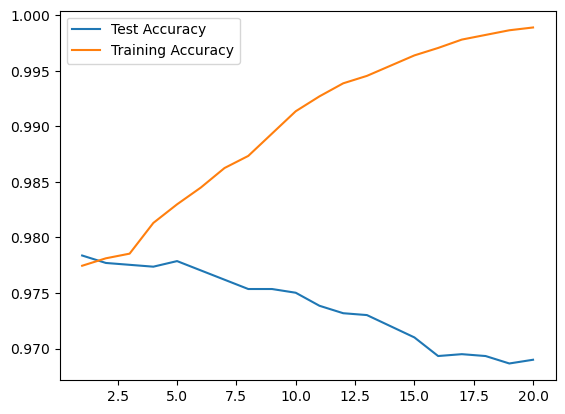

In [29]:
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.metrics import accuracy_score as acc
import matplotlib.pyplot as plt
import numpy as np
accuracy_test=[]
accuracy_train=[]
for i in range(1,21):
    dt_model = dt(max_depth=i,random_state=0).fit(X_train, y_train)
    accuracy_1 = acc(y_test, dt_model.predict(X_test))
    accuracy_2 = acc(y_train, dt_model.predict(X_train))
    accuracy_test.append(accuracy_1)
    accuracy_train.append(accuracy_2)
depth=np.linspace(1,20, num = 20)
plt.plot(depth,accuracy_test,label="Test Accuracy")
plt.plot(depth,accuracy_train,label="Training Accuracy")
plt.legend(loc="upper left")
plt.show()

What trend do you observe in the training and test accuracies as `max_depth` increases? Explain the trend.

### Answer: We can see from the plot that as max_depth increases, the training accuracy increases while the test accuracy decreases. This happens because depth determine how flexible the model is,  increasing the depth will help fitting deeper into the training data and thus increase the accuracy of the training set. However, it will also cause overfitting problem, thus decrease the accuracy for the general performance, and that's why the test accuracy is decreasing.


For `n_estimators` ranging from 1 to 101 with step size 10, fit random forest classifiers to the training data. Use `random_state=0` and `max_depth=3`. Plot training vs. test accuracy.

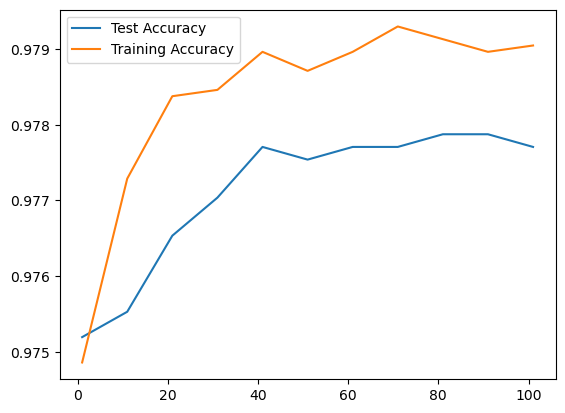

In [39]:
from sklearn.ensemble import RandomForestClassifier as rf
accuracy_test2=[]
accuracy_train2=[]
for i in range(1,102,10):
    rf_model=rf(n_estimators = i, max_depth = 3, random_state = 0).fit(X_train, y_train)
    accuracy_test2.append(acc(y_test, rf_model.predict(X_test)))
    accuracy_train2.append(acc(y_train, rf_model.predict(X_train)))
n=np.linspace(1,101, num = 11) 
plt.plot(n, accuracy_test2,label="Test Accuracy")
plt.plot(n, accuracy_train2,label="Training Accuracy")
plt.legend(loc="upper left")
plt.show()

What trend do you observe in the training and test accuracies as `n_estimators` increases? Explain the trend.

### Answer: From the plot, we can see that as n_estimators increases, both the training and test accuracies increase, and to some point, the increment slows down(flattened). The n_estimators parameter specifies the number of trees in the forest of the model, and increasing it means adding more subsamples to fit the data, thus result in increasing accuracies for test and training sets. However, as the model's accuracies getting better and better, the increment would slow down since the accuracies are already high enough.
